In [35]:
import tensorflow as tf
import zipfile
import os 
import random
import csv
import math
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
#extracting data from zip
try:
    local_zip = './data/archive.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./data')
    zip_ref.close()
#if data is already extracted it will instead print file already extracted
except:
    print('file already extracted')

In [27]:
tumor=[]
for j in range (1,8):
    data=[]
    img=[]
    with open('./data/GroundTruth.csv') as f:
        reader = csv.reader(f, delimiter=',')
        next(reader)
        for row in reader:
            img.append(row[0] + '.jpg')
            data.append(math.ceil(float(row[j])))
        tumor.append(data)
print(f"there is {len(data)} data")
print(len(tumor))

there is 10015 data
7


In [11]:
root_dir = "./data/cancerimages/"
dir = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions']

def create_dir(root_path):
    if os.path.exists(root_dir):
        shutil.rmtree(root_dir)
    else:
        os.makedirs(os.path.join(root_path, 'training'))
        os.makedirs(os.path.join(root_path, 'validation'))

        for i in dir:
            os.makedirs(os.path.join(f'{root_path}/training', i))
            os.makedirs(os.path.join(f'{root_path}/validation', i))
            
create_dir(root_path=root_dir)

In [12]:
counter = 0
for i in range (len(tumor)):
    labels = []
    for j in range (len(tumor[i])):
        if tumor[i][j] == 1:
            labels.append(img[j])
    print(f"Tumor {dir[counter]} have {len(labels)} data")
    split = round(len(labels) * 0.8)

    training = labels[:split]
    val = labels[split:]
    print(f"Training data is {len(training)}")
    print(f"Validation data is {len(val)}\n")
    
    root = './data/images/'
    root_dest = './data/cancerimages'
    for i in training:
        source_img = os.path.join(root, i)
        destination = os.path.join(f"{root_dest}/training/{dir[counter]}", i)
        copyfile(source_img, destination)
    
    for i in val:
        source_img = os.path.join(root, i)
        destination = os.path.join(f"{root_dest}/validation/{dir[counter]}", i)
        copyfile(source_img, destination)
        
    counter+=1

Tumor melanoma have 1113 data
Training data is 890
Validation data is 223

Tumor melanocytic_nevi have 6705 data
Training data is 5364
Validation data is 1341

Tumor basal_cell_carcinoma have 514 data
Training data is 411
Validation data is 103

Tumor bowen_disease have 327 data
Training data is 262
Validation data is 65

Tumor benign_keratosis have 1099 data
Training data is 879
Validation data is 220

Tumor dermatofibroma have 115 data
Training data is 92
Validation data is 23

Tumor vascular_lesions have 142 data
Training data is 114
Validation data is 28



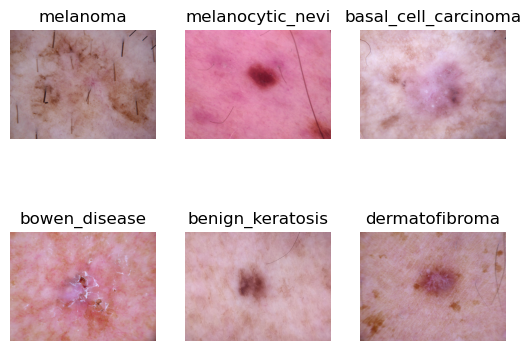

In [31]:
#show image example
root_path = root_dir + 'training/'
fig, axes = plt.subplots(2, 3)
counter = 0
for i in range(2):
    for j in range(3):
        ax = axes[i][j]
        ax.set_title(dir[counter])
        ax.imshow(load_img(f"{os.path.join(f'{root_path}/{dir[counter]}', os.listdir(f'{root_path+dir[counter]}')[random.randint(0,100)])}"))
        ax.set_axis_off()
        plt.show
        counter += 1

In [32]:
training_main = './data/cancerimages/training/'
validation_main = './data/cancerimages/validation/'

In [33]:
class_names = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions']

class_paths = []
class_paths1 = []
for class_name in class_names:
    class_path = os.path.join(training_main, class_name)
    class_path1 = os.path.join(validation_main, class_name)
    class_paths.append(class_path)
    class_paths1.append(class_path1)

In [34]:
for i, class_path in enumerate (class_paths):
    print(class_path)
    
for i, class_path in enumerate (class_paths1):
    print(class_path)

./data/cancerimages/training/melanoma
./data/cancerimages/training/melanocytic_nevi
./data/cancerimages/training/basal_cell_carcinoma
./data/cancerimages/training/bowen_disease
./data/cancerimages/training/benign_keratosis
./data/cancerimages/training/dermatofibroma
./data/cancerimages/training/vascular_lesions
./data/cancerimages/validation/melanoma
./data/cancerimages/validation/melanocytic_nevi
./data/cancerimages/validation/basal_cell_carcinoma
./data/cancerimages/validation/bowen_disease
./data/cancerimages/validation/benign_keratosis
./data/cancerimages/validation/dermatofibroma
./data/cancerimages/validation/vascular_lesions


In [36]:
# GRADED FUNCTION: train_val_generators

def train_val_generators(training_main, validation_main):
    train_datagen = ImageDataGenerator(
        rescale=1./255.,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    train_generator = train_datagen.flow_from_directory(
        directory=training_main,
        target_size=(150, 150),
        batch_size=45,
        class_mode='categorical'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255.)
    validation_generator = validation_datagen.flow_from_directory(
        directory=validation_main,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

    return train_generator, validation_generator

In [37]:
train_generator, validation_generator = train_val_generators(training_main, validation_main)

Found 8012 images belonging to 7 classes.
Found 2003 images belonging to 7 classes.


In [44]:
def create_model():
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
  ])
  

    model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])       
  
    return model

In [ ]:
# Save your model
model = create_model()


# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
 34/179 [====>.........................] - ETA: 3:44 - loss: 1.4731 - accuracy: 0.6059